In [1]:
"""A design example of a circular column on a slab according
to the provisions of §6.4 in EC2.
"""
import matplotlib.pyplot as plt
import ipywidgets as widgets

from dx_punch.EC2.slab import Slab
from dx_eurocode.EC2.materials import RC
%matplotlib inline

In [2]:
slab_data = {
    'type': 'floor-slab', # {['floor-slab'], 'raft', 'base'}
    'geometry': {
        'bx': 6.25, # breadth along x
        'by': 11.45, # breadh along y
        'thickness': 0.30,
        # Position of the origin of the coordinate-system of the shape (one of the four vertices of the rectangle,
        # or the centroid)
        'position': 'lower-left' # {'lower-left', 'lower-right', 'upper-left', 'upper-right', ['centroid']}
    },
    'materials': {
        'fck': 30, # Characteristic cylinder strength of concrete [MPa]
        'fyk': 500 # Characteristic yield strength of steel [MPa]
    },
    'reinforcement': { # Distribution of reinforcement on the slab
        'uniform': [{
            # The axis along which the bars are distributed
            'axes': 'xy', # {['x'], 'y', 'xy'}. If 'xy', it is assumed that reinforcement is uniform along
            # both axes
            'phi': 0.010, # bar diameter [m]
            's': 0.200, # spacing [m]
            'd': 0.27 # effective depth [m]
        },
        ],
    },
    'soil-pressure': [{
        'LC': 'LC0', # Should be consistent with the load-case names of the internal forces
        'value': 0.  # [Pa]
    },
    ],
    'columns': [{
        'id': 'C0',
        'geometry': {
            'shape': 'circle',
            'r': 0.125, # Radius of the column [m]
            'center': {"x": 5., "y": 5.} # Coordinates of the center               
        },
        'load-cases': [{
            'name': 'LC0',
            'N': 111e+03,  # Compressive force [N]
            'Mex': 25e+03, # [N.m]
            'Mey': 22e+03, # [N.m]
        },],
        'drop-panel': {
            'lx': 0.4, # Offset from the column sides along x [m]
            'ly': 0.6, # Optional: If ommited it is assumed that lx=ly [m]
            'height': 0.2  # Height of the drop-panel [m]
        }
    }
    ]
}

In [3]:
slab = Slab.from_json(slab_data)

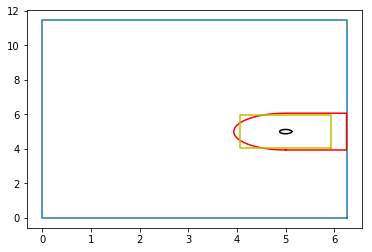

In [4]:
plt.plot(slab.boundary.xy[0], slab.boundary.xy[1])
for column in slab.columns:
    plt.plot(column.boundary.xy[0], column.boundary.xy[1], 'k')
    u = column.ui
    plt.plot(u.boundary.xy[0], u.boundary.xy[1], 'r')
    plt.plot(column.tensile.effective_region.boundary.xy[0], column.tensile.effective_region.boundary.xy[1], 'y')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc447b28e80>)

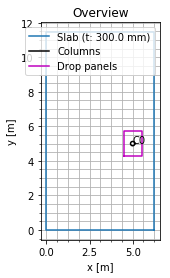

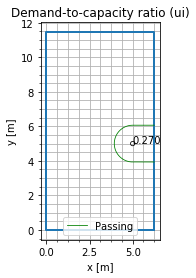

In [5]:
slab.postprocessor.plot_geometry()
slab.postprocessor.plot_ui()

In [6]:
slab.to_json()

'{"Columns": {"C0": {"Position": "edgex", "Geometry": {"Centroid": {"x [m]": 5.0, "y [m]": 5.0}, "Bounding box": {"bx [mm]": 250.0, "by [mm]": 250.0}}, "Effective depth [mm]": 270.0, "Tensile Reinforcement": {"Effective tensile region": {"bx [mm]": 1870.0, "by [mm]": 1870.0, "Centroid (offset)": {"dx [mm]": "0.0", "dy [mm]": "0.0"}}, "x-axis": "T10@200", "y-axis": "T10@200", "\\u03c1x": 0.0015, "\\u03c1y": 0.0015, "\\u03c1l": 0.0015}, "Drop panel": {"lx [mm]": 400.0, "ly [mm]": 600.0, "H [mm]": 200.0}, "Design": {"Perimeter u0": {"Most adverse loadcase": {"name": "LC0", "Ved [kN]": 111.0, "Mex [kN.m]": 25.0, "Mey [kN.m]": 22.0, "ex [mm]": -198.2, "ey [mm]": 225.2}, "\\u03b2": 3.263, "ved [kPa]": 1027.6, "vrd [kPa]": 5280.0, "DCR (ved/vrd)": "0.195"}, "Perimeter u1": {"Most adverse loadcase": {"name": "LC0", "Ved [kN]": 111.0, "Mex [kN.m]": 25.0, "Mey [kN.m]": 22.0, "ex [mm]": -198.2, "ey [mm]": 225.2}, "\\u03b2": 1.867, "ved [kPa]": 131.3, "vrd [kPa]": 486.6, "DCR (ved/vrd)": "0.270"}}